<div style="width: 100%; overflow: hidden;">
    <div style="width: 150px; float: left;"> <img src="https://raw.githubusercontent.com/DataForScience/Networks/master/data/D4Sci_logo_ball.png" alt="Data For Science, Inc" align="left" border="0" width=150px> </div>
    <div style="float: left; margin-left: 10px;"> 
        <h1>Probability And Statistics For Everyone</h1>
        <h1>Probability</h1>
        <p>Bruno Gonçalves<br/>
        <a href="http://www.data4sci.com/">www.data4sci.com</a><br/>
        @bgoncalves, @data4sci</p></div>
</div>

In [1]:
from collections import Counter
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

import scipy
from scipy import stats

import watermark

%load_ext watermark
%matplotlib inline

In [2]:
%watermark -n -v -m -g -iv

Python implementation: CPython
Python version       : 3.8.5
IPython version      : 7.19.0

Compiler    : Clang 10.0.0 
OS          : Darwin
Release     : 22.4.0
Machine     : x86_64
Processor   : i386
CPU cores   : 16
Architecture: 64bit

Git hash: 593e30c0dfcafd50401dbb083769424707ebe00c

numpy     : 1.24.2
matplotlib: 3.3.2
scipy     : 1.6.1
json      : 2.0.9
watermark : 2.1.0



Set the default style

In [3]:
plt.style.use('./d4sci.mplstyle')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

## Coin flips and Dice Rolls

Let's define a simple function to generate coin flips. Heads = 1, Tails = -1. We can specify how many coins we want to flip at each step and how many steps we want and what the prob of heads is

In [4]:
def flip_coin(n_coins, n_times, p=0.5):
    return 2*(np.random.random((n_times, n_coins)) < p)-1

If we to flip a fair single coin 10 times

In [5]:
coins = flip_coin(1, 10)

In [6]:
print(coins)

[[-1]
 [-1]
 [ 1]
 [-1]
 [-1]
 [ 1]
 [ 1]
 [-1]
 [-1]
 [ 1]]


Or 3 coins 10 times

In [7]:
coins = flip_coin(3, 10)

In [8]:
print(coins)

[[ 1 -1  1]
 [-1 -1 -1]
 [-1 -1 -1]
 [-1 -1  1]
 [-1 -1  1]
 [-1 -1 -1]
 [-1  1  1]
 [-1 -1 -1]
 [ 1  1  1]
 [ 1  1  1]]


Similar function to roll dice. Here we must specify how many sides we want, defaulting to 6

In [9]:
def roll_dice(n_dice, n_times, sides=6):
    return np.random.randint(1, sides+1, size=(n_times, n_dice))

If we roll 2 dice 10 times

In [10]:
roll_dice(2, 10)

array([[6, 3],
       [1, 1],
       [2, 5],
       [3, 5],
       [3, 1],
       [1, 3],
       [4, 5],
       [1, 4],
       [3, 5],
       [3, 6]])

## Probability mass function

Utility function to calculate a histogram of values. Can be normalized to 1 or not

In [11]:
def pmf(values, normed=False):
    counts = Counter(values.flatten())
    output = np.array(sorted(counts.items(), key=lambda x: x[0]), dtype='float')
    
    if normed:
        norm = output.T[1].sum()
        output.T[1] = output.T[1]/norm
    
    return output

Let's check that how six sided die is fair by rolling it 100,000 times and checking the distribution

In [12]:
values = roll_dice(1, 100_000)

In [13]:
values[:10]

array([[1],
       [5],
       [5],
       [5],
       [1],
       [5],
       [2],
       [6],
       [4],
       [4]])

In [14]:
dist = pmf(values, normed=True)

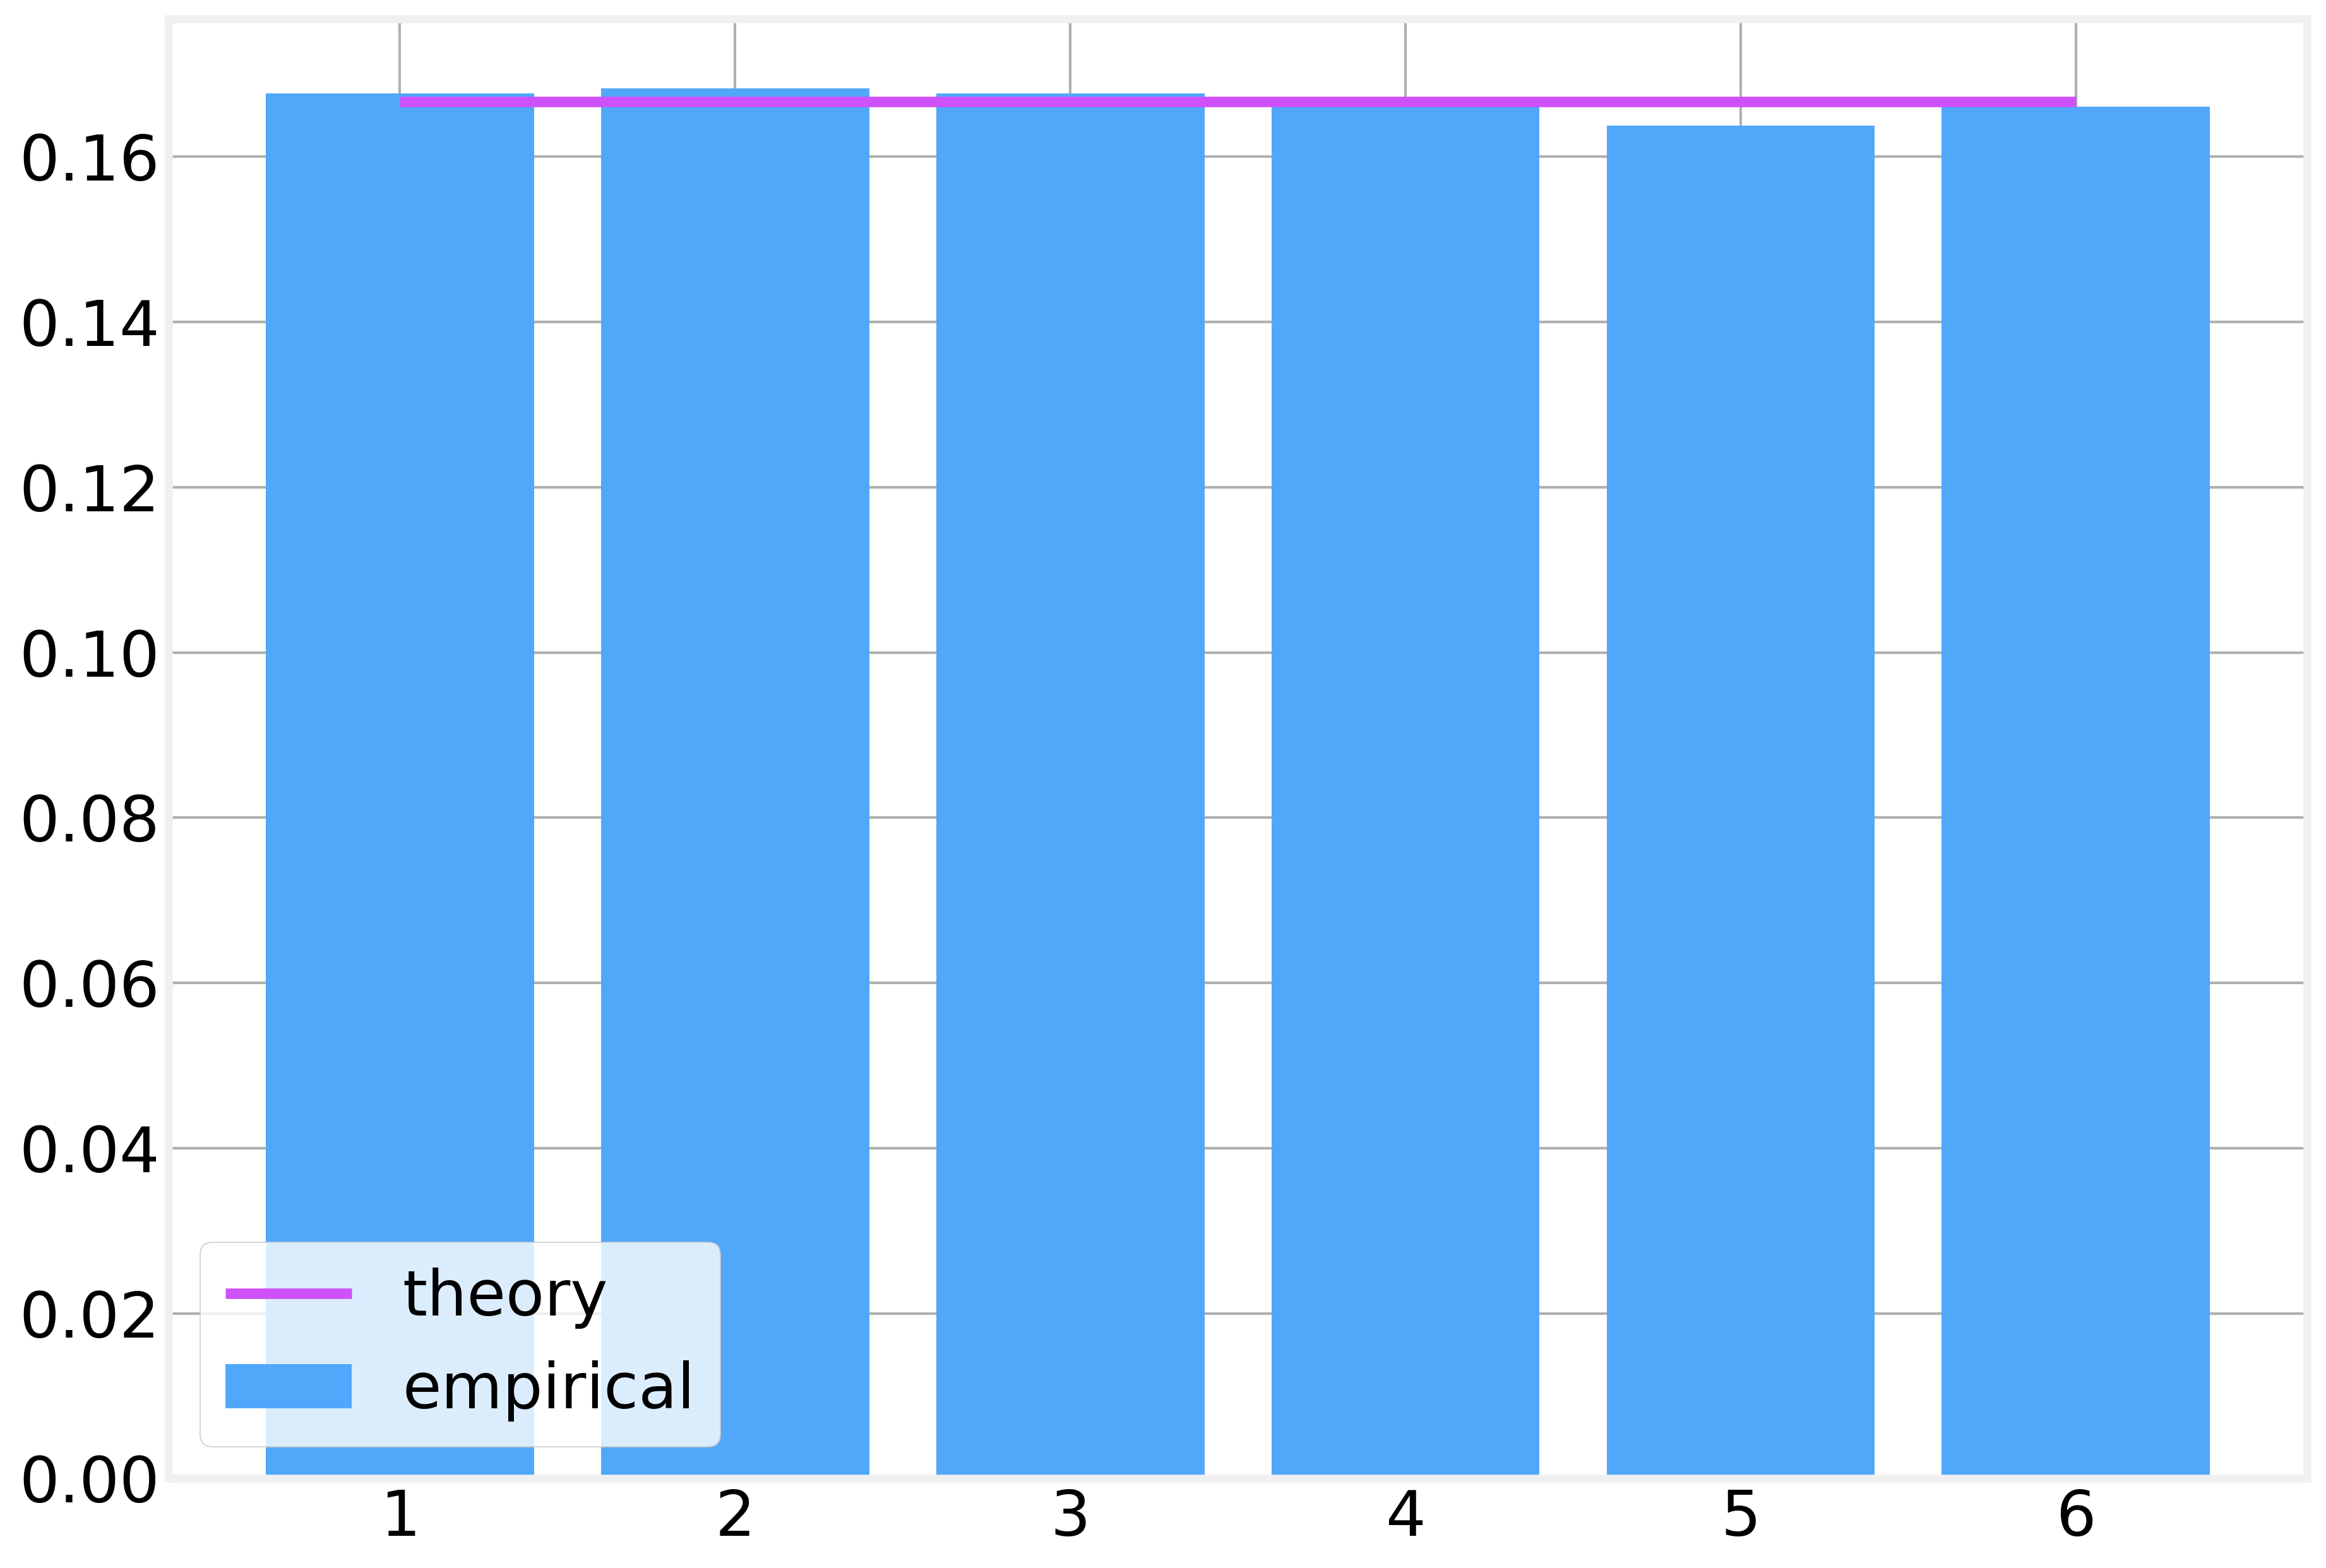

In [15]:
fig, ax = plt.subplots(1)
ax.bar(dist.T[0], dist.T[1], label='empirical')
ax.plot([1, 6], [1/6., 1/6.], label='theory', color=colors[1])
ax.legend()

As we can see, we're right on the money.

### Continuous version

We're going to throw 100,000 darts at a unit square and see how many fall within the quarter circle

In [16]:
darts = np.random.random((100_000, 2))

In [17]:
darts[:10]

array([[0.32313737, 0.20006852],
       [0.79223558, 0.75388807],
       [0.09348865, 0.84237514],
       [0.63417044, 0.49997469],
       [0.53072739, 0.25285177],
       [0.13923997, 0.25314508],
       [0.1794981 , 0.19575833],
       [0.21294894, 0.79572874],
       [0.62608568, 0.29573084],
       [0.73688199, 0.37079689]])

In [18]:
radius = np.sqrt(np.power(darts, 2).sum(axis=1))

The darts that land at a distance of 1 or less from the origin are inside the circle

In [19]:
inside = radius <= 1

We have roughly 78,000 of those:

In [20]:
len(darts[inside])

78460

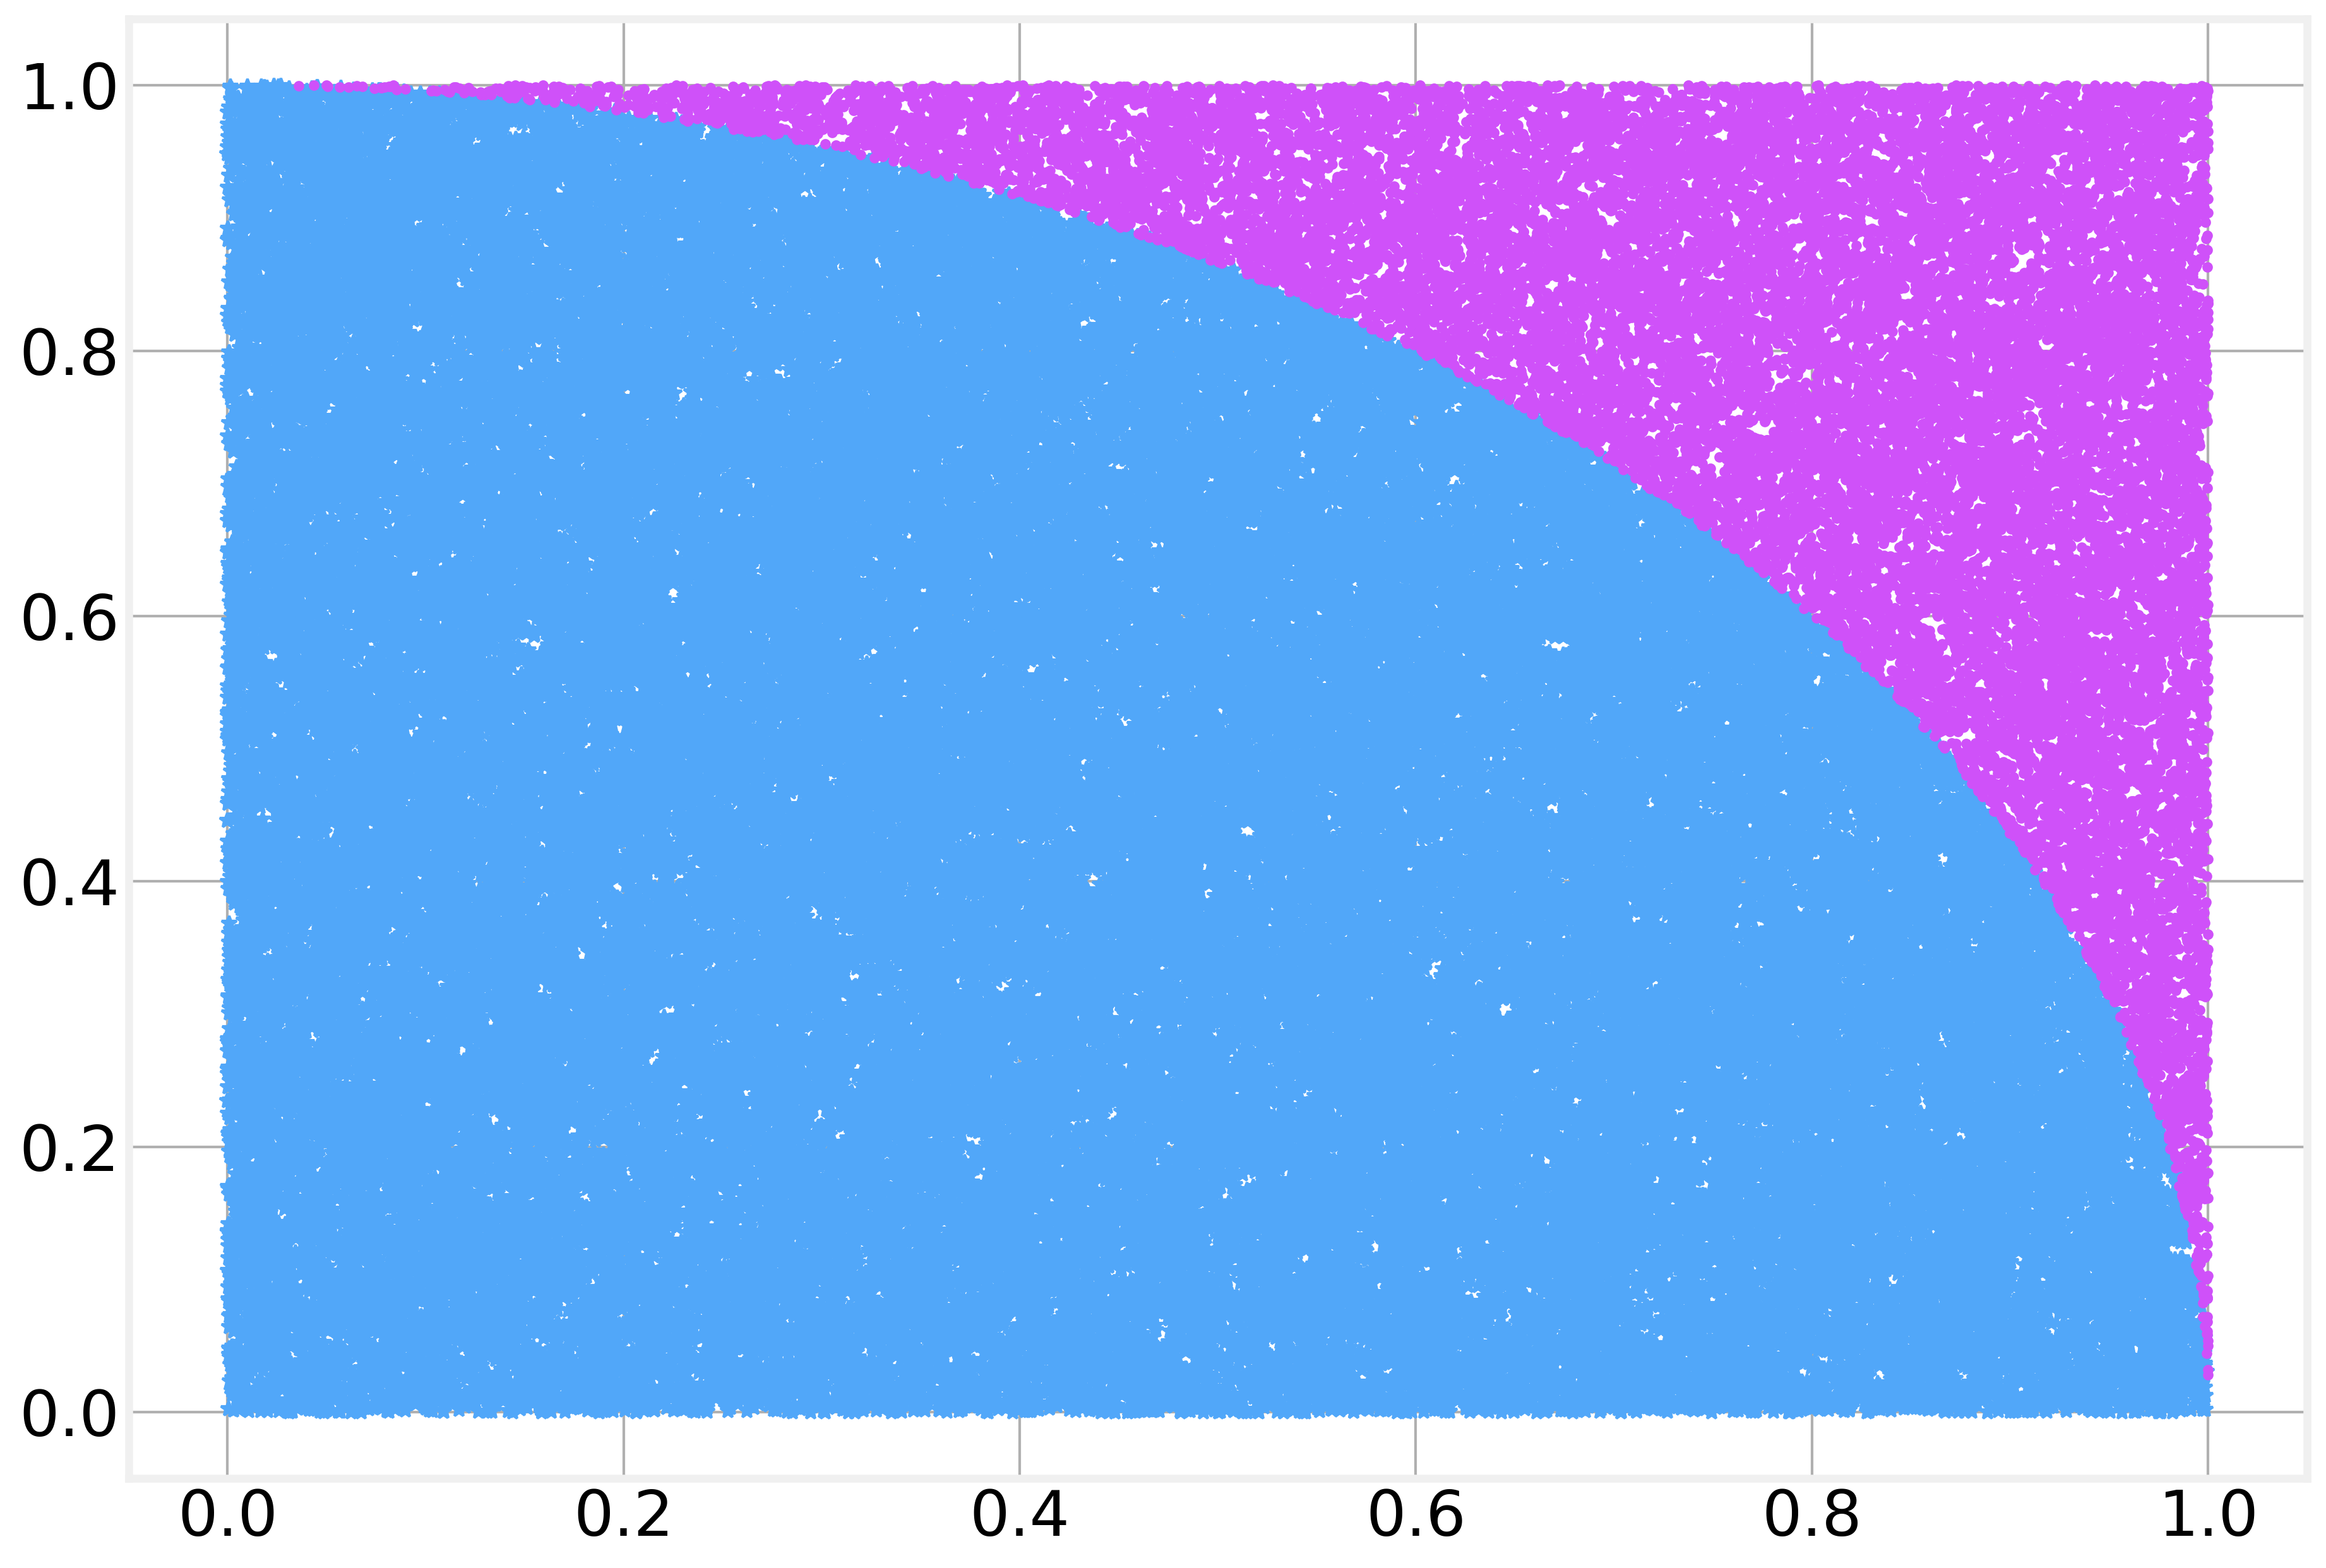

In [21]:
plt.plot(darts[inside].T[0], darts[inside].T[1], '*')
plt.plot(darts[~inside].T[0], darts[~inside].T[1], '.')

All others land outside. The ratio between the two is:

In [22]:
len(darts[inside])/len(darts)

0.7846

which give us a rough approximation to the measurement of $\pi/4\sim0.7853$. Naturally, throwing more darts would provide a better estimate. This technique is known as Monte-Carlo Integration and is very commonly used when we're interested in estimating values of complex functions

## Sums and Averages

In [23]:
values = flip_coin(5, 10_000)

In [24]:
values[:10]

array([[-1,  1, -1,  1,  1],
       [ 1,  1, -1,  1,  1],
       [ 1, -1, -1, -1, -1],
       [-1,  1, -1, -1, -1],
       [-1, -1, -1,  1, -1],
       [ 1, -1,  1,  1,  1],
       [ 1,  1,  1, -1, -1],
       [-1, -1,  1,  1,  1],
       [-1,  1, -1, -1, -1],
       [ 1,  1, -1, -1, -1]])

In [25]:
total = values.sum(axis=1)

In [26]:
total[:10]

array([ 1,  3, -3, -3, -3,  3,  1,  1, -3, -1])

In [27]:
dist = pmf(total, normed=True)

Simply compute the probability using the formula derived in the slides

In [28]:
prob = np.array([
    np.math.factorial(5)/(
        np.math.factorial(i)*np.math.factorial(5-i)
    )*np.power(0.5, i)*np.power(0.5, 5-i) 
    for i in range(6)])

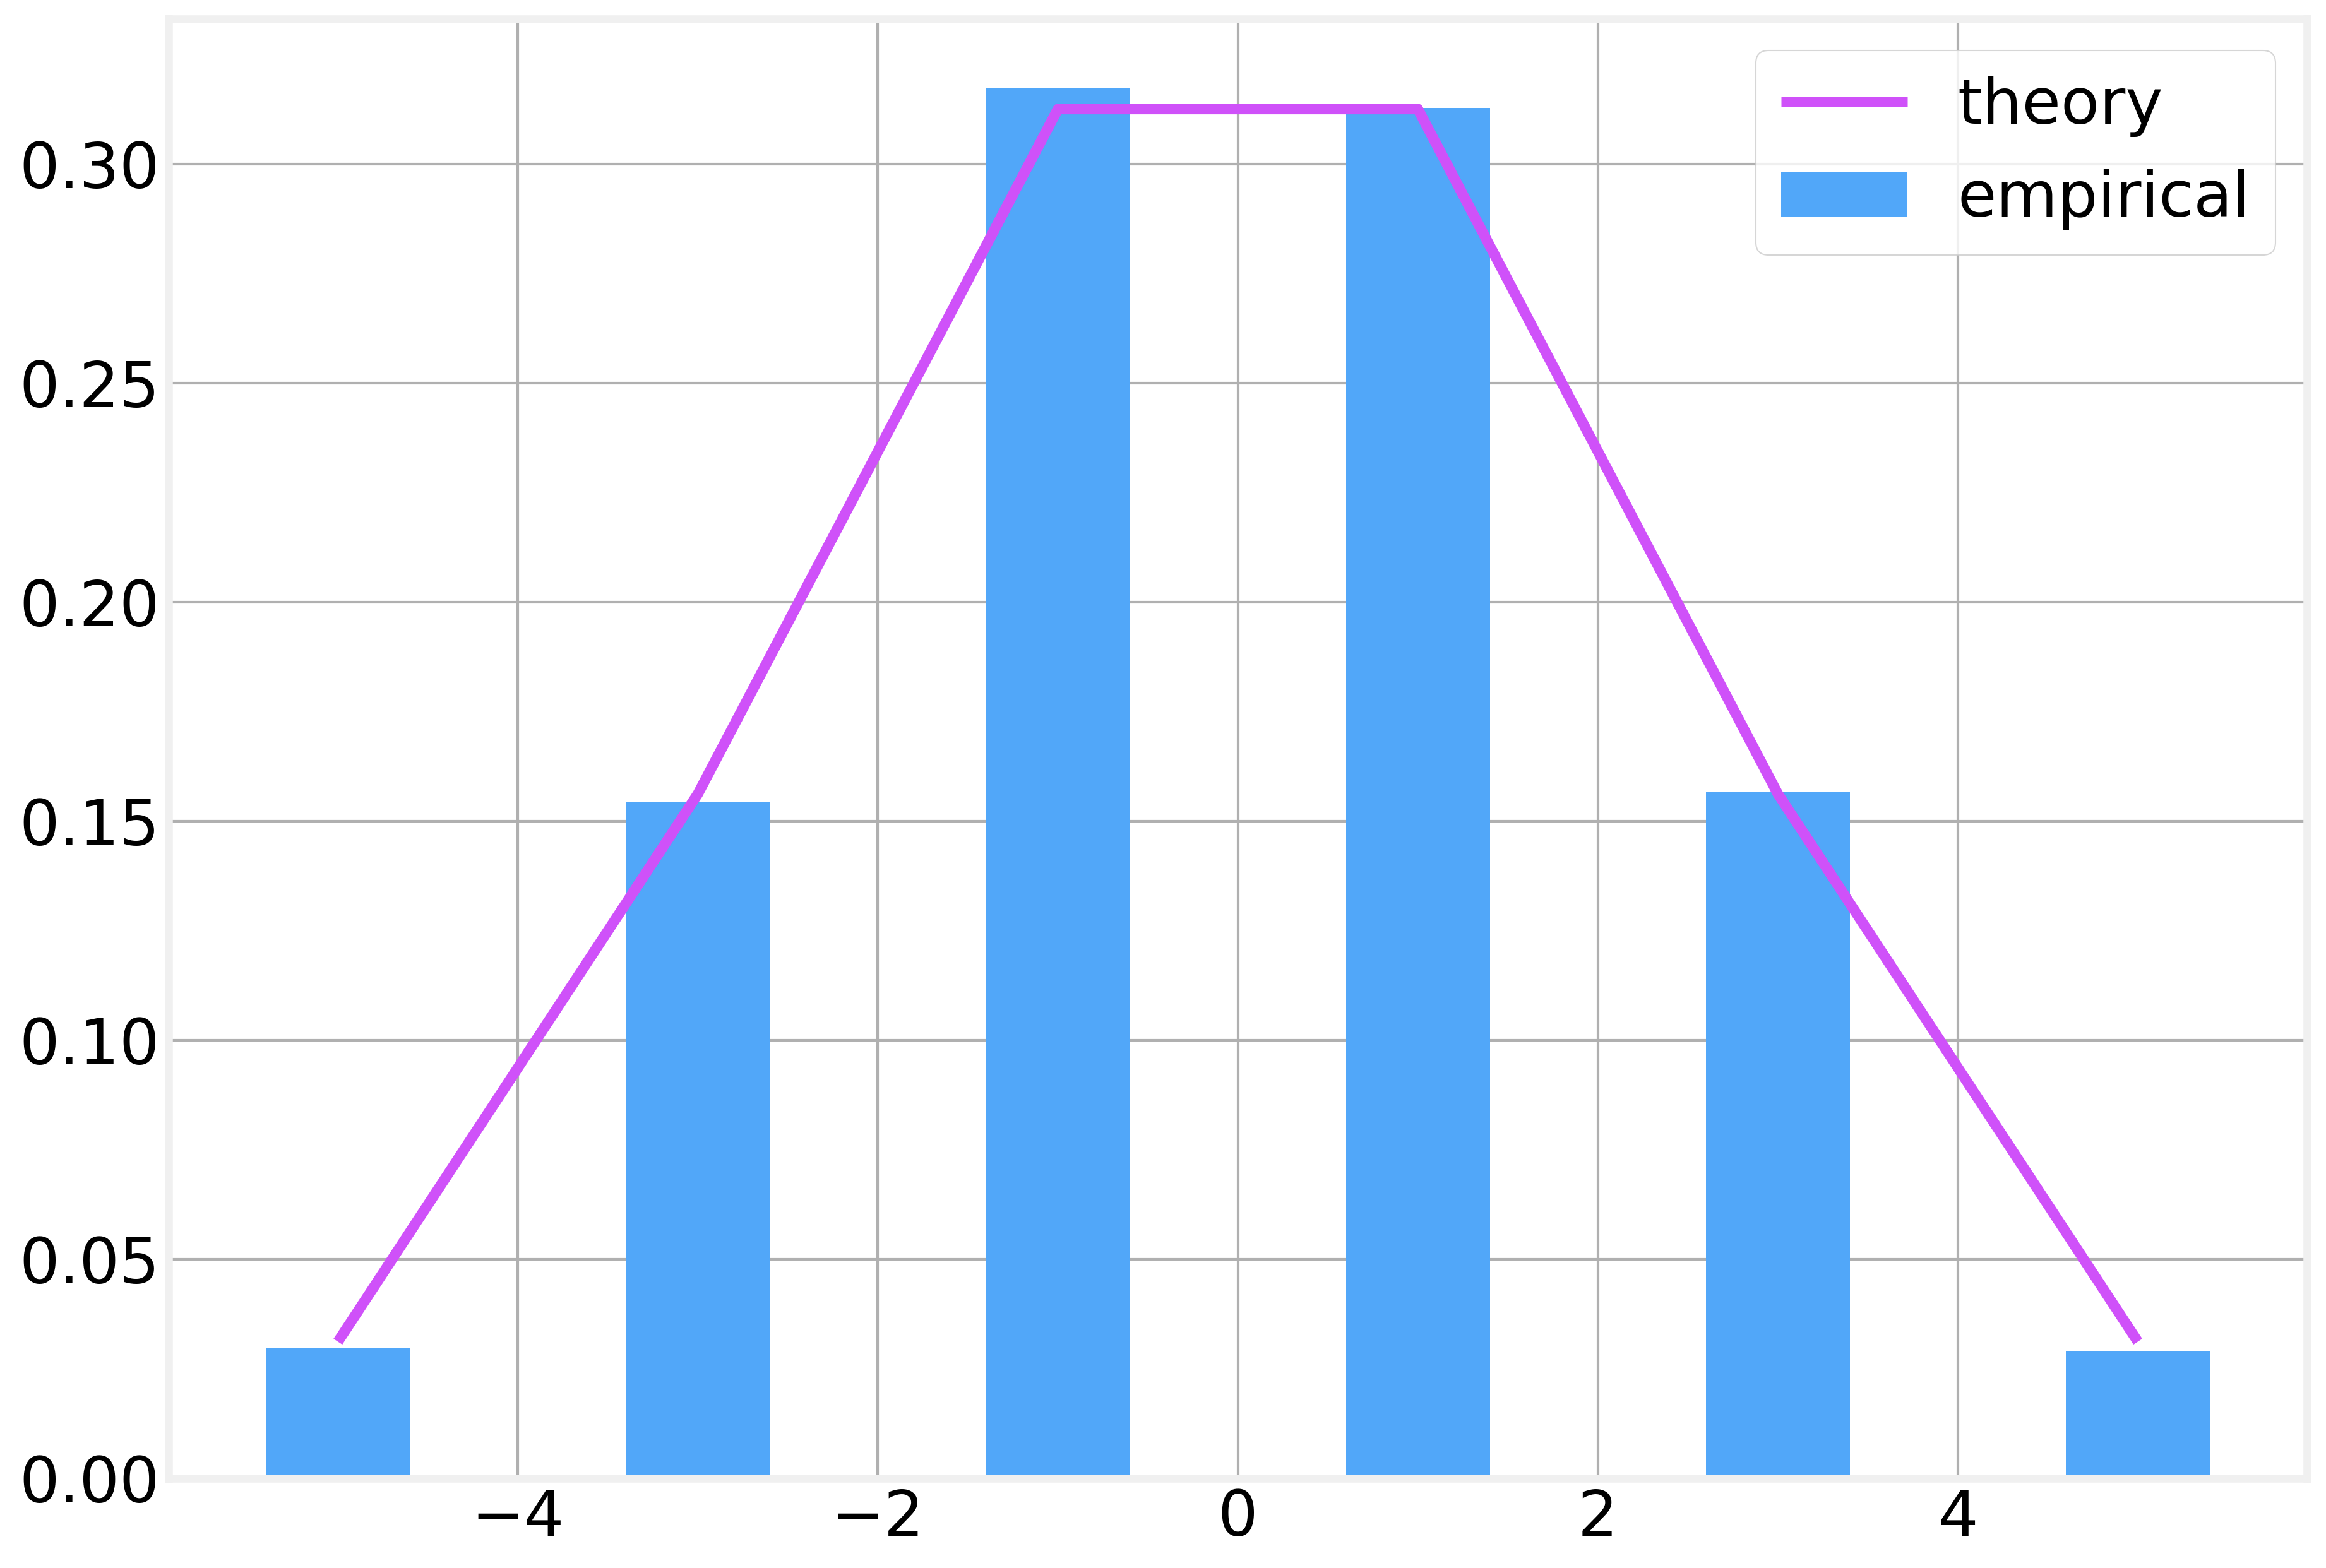

In [29]:
fig, ax = plt.subplots(1)
ax.bar(dist.T[0], dist.T[1], label="empirical")
ax.plot([-5, -3, -1, 1, 3, 5], prob, label="theory", color=colors[1])
ax.legend()

Naturally, we expect the curve to be symmetric as there are exactly as many ways of having 3 heads and 2 tails as there are of having 3 tails and 2 heads.

<div style="width: 100%; overflow: hidden;">
     <img src="data/D4Sci_logo_full.png" alt="Data For Science, Inc" align="center" border="0" width=300px> 
</div>